In [21]:
import numpy as np
import pandas as pd


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [3]:
train = pd.read_csv('bigmart_train.csv')

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train.shape

(8523, 12)

In [6]:
train.isnull().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [8]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [10]:
train['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [11]:
train['Outlet_Age'] = 2020 - train['Outlet_Establishment_Year'] 

In [12]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33


In [13]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [14]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,22.168133
std,4.643456,0.051598,62.275067,8.371760,1706.499616,8.371760
min,4.555000,0.000000,31.290000,1985.000000,33.290000,11.000000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400,16.000000
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000,21.000000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400,33.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,35.000000


In [15]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [16]:
train['Outlet_Size'].value_counts()


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [18]:
train['Outlet_Size'].mode()[0]

'Medium'

In [19]:
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

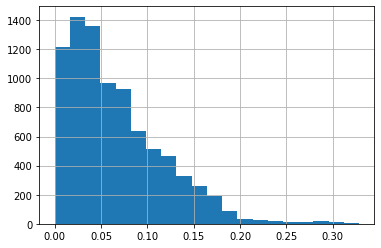

In [23]:
train['Item_Visibility'].hist(bins=20)

In [25]:
Q1 = train['Item_Visibility'].quantile(0.25)
Q3 = train['Item_Visibility'].quantile(0.75)
IQR = Q3-Q1

In [26]:
IQR

0.067595815

In [30]:
filt_train = train.query('(@Q1 - 1.5*@IQR) <= Item_Visibility <= (@Q3 + 1.5*@IQR)')

In [31]:
filt_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,33
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,18
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,16
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,11


In [32]:
filt_train.shape,train.shape

((8379, 13), (8523, 13))

In [33]:
train = filt_train

In [34]:
train.shape

(8379, 13)

In [35]:
train['Item_Visibility'] = pd.cut(train['Item_Visibility'],[0.000,0.065,0.13,0.2],labels=['Low Viz','Viz','High Viz'])

C:\Users\asm1318\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
train['Item_Visibility'].value_counts()

Low Viz     4403
Viz         2557
High Viz     893
Name: Item_Visibility, dtype: int64

In [37]:
train['Item_Visibility'] = train['Item_Visibility'].replace(np.nan,'Low Viz',regex=True)

C:\Users\asm1318\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['Low fat','LF','low fat'],'Low Fat')

C:\Users\asm1318\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('reg','Regular')

C:\Users\asm1318\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,Low Viz,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,Low Viz,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,Low Viz,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,Low Viz,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,Low Viz,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33


In [46]:
le = LabelEncoder()

In [47]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [48]:
train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])

C:\Users\asm1318\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
train['Item_Visibility'] = le.fit_transform(train['Item_Visibility'])

C:\Users\asm1318\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
train['Outlet_Size'] = le.fit_transform(train['Outlet_Size'])

C:\Users\asm1318\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'])

C:\Users\asm1318\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
dummy = pd.get_dummies(train['Outlet_Type'])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [53]:
train = pd.concat([train,dummy],axis=1)

In [54]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility                int32
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                   object
Item_Outlet_Sales            float64
Outlet_Age                     int64
Grocery Store                  uint8
Supermarket Type1              uint8
Supermarket Type2              uint8
Supermarket Type3              uint8
dtype: object

In [56]:
train = train.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type'],axis=1)

In [57]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0,1,249.8092,1999,1,0,3735.1380,21,0,1,0,0
1,5.92,1,1,48.2692,2009,1,2,443.4228,11,0,0,1,0
2,17.50,0,1,141.6180,1999,1,0,2097.2700,21,0,1,0,0
3,19.20,1,1,182.0950,1998,1,2,732.3800,22,1,0,0,0
4,8.93,0,1,53.8614,1987,0,2,994.7052,33,0,1,0,0


In [81]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())

In [82]:
X = train.drop('Item_Outlet_Sales',axis=1)

In [83]:
X.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Age                   0
Grocery Store                0
Supermarket Type1            0
Supermarket Type2            0
Supermarket Type3            0
dtype: int64

In [84]:
y = train.Item_Outlet_Sales

In [85]:
test = pd.read_csv('bigmart_test.csv')

In [86]:
test['Outlet_Size'] = test['Outlet_Size'].fillna('Medium')

In [87]:
test['Item_Visibility'] = pd.cut(test['Item_Visibility'],[0.000,0.065,0.13,0.2],labels=['Low Viz','Viz','High Viz'])

In [88]:
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [89]:
test['Item_Visibility'] = test['Item_Visibility'].replace(np.nan,'Low Viz',regex=True)

In [90]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['Low fat','LF','low fat'],'Low Fat')

In [91]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('reg','Regular')

In [92]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [93]:
test['Item_Fat_Content'] = le.fit_transform(test['Item_Fat_Content'])

In [94]:
test['Item_Visibility'] = le.fit_transform(test['Item_Visibility'])

In [95]:
test['Outlet_Size'] = le.fit_transform(test['Outlet_Size'])

In [96]:
test['Outlet_Location_Type'] = le.fit_transform(test['Outlet_Location_Type'])

In [97]:
dummy = pd.get_dummies(test['Outlet_Type'])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,0,0,0,1


In [98]:
test = pd.concat([test,dummy],axis=1)

In [99]:
test = test.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type'],axis=1)

In [100]:
from sklearn import model_selection

In [101]:
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size = 0.25,random_state=42)

In [102]:
lin = LinearRegression()

In [103]:
lin.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
print(lin.coef_)

[ 2.36034951e+00  3.94321495e+01  1.82130320e+01  1.57775913e+01
  2.02440045e+13  1.51193689e+01  1.15984788e+00  2.02440045e+13
 -2.68644633e+10 -2.68644613e+10 -2.68644617e+10 -2.68644599e+10]


In [105]:
lin.intercept_

-4.0892862200732024e+16

In [106]:
predictions = lin.predict(xtest)

In [108]:
print(sqrt(mean_squared_error(ytest,predictions)))

1103.789840140855


In [110]:
from sklearn.linear_model import Ridge

In [111]:
ridge = Ridge(alpha=0.001,normalize=True)


In [112]:
ridge.fit(xtrain,ytrain)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [113]:
print(sqrt(mean_squared_error(ytrain,ridge.predict(xtrain))))
print(sqrt(mean_squared_error(ytest,ridge.predict(xtest))))

1142.6796513254258
1103.7536881633275


In [114]:
print('R2 Value/Coef of determination:{}'.format(ridge.score(xtest,ytest)))

R2 Value/Coef of determination:0.5599469096857563


In [115]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001)

In [116]:
lassoreg.fit(xtrain,ytrain)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [117]:
print(sqrt(mean_squared_error(ytrain,lassoreg.predict(xtrain))))
print(sqrt(mean_squared_error(ytest,lassoreg.predict(xtest))))

1142.6789651406675
1103.7690235217378


In [118]:
print('R2 Value/Coef of determination:{}'.format(lassoreg.score(xtest,ytest)))

R2 Value/Coef of determination:0.5599346815612893


In [119]:
from sklearn.linear_model import ElasticNet
Elas = ElasticNet(alpha=0.001,normalize=True)

In [120]:
Elas.fit(xtrain,ytrain)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [121]:
print(sqrt(mean_squared_error(ytrain,Elas.predict(xtrain))))
print(sqrt(mean_squared_error(ytest,Elas.predict(xtest))))

1487.200407744838
1440.8357892570866


In [122]:
print('R2 Value/Coef of determination:{}'.format(Elas.score(xtest,ytest)))

R2 Value/Coef of determination:0.2501235501305319
